# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [121]:
# Checking the number of mice.
mice_number = mouse_study["Mouse ID"].nunique()
mice_number

#Why doesn't len.mouse_study["Mouse ID"].unique() work?

249

In [122]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_duplicate = mouse_study.sort_values(by=["Mouse ID", "Timepoint"])

In [123]:
duplicate = mouse_study[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [124]:
# Optional: Get all the data for the duplicate mouse ID. 
# mice_duplicate


In [134]:
duplicate_clean = mouse_study.loc[mouse_study["Mouse ID"]!="g989"]


In [133]:
len(duplicate_clean["Mouse ID"].unique())

248

In [136]:
testing = duplicate_clean.loc[duplicate_clean["Mouse ID"]!="g989"]
testing

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [126]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean = mouse_study.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mice_clean


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [137]:
# Checking the number of mice in the clean DataFrame.
duplicate_clean.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mice_mean = mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
mice_median = mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
mice_variance = mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
mice_std = mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
mice_sem = mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean": mice_mean,
                             "Median": mice_median,
                             "Variance": mice_variance,
                             "Standard Deviation": mice_std,
                             "SEM": mice_sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [129]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_table = mouse_study.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(["mean", "median", "var", "std", "sem"])
summary_statistics_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

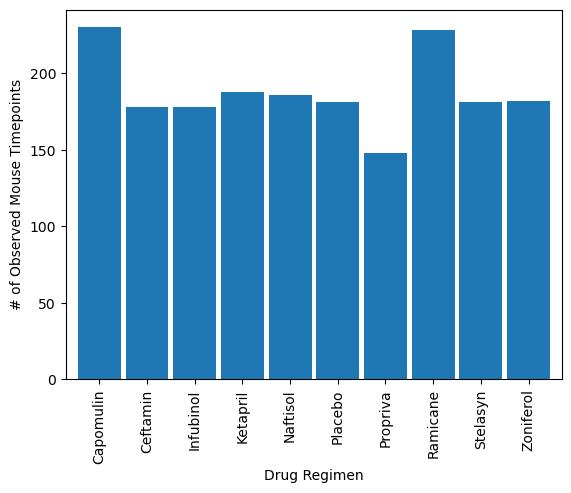

In [141]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = duplicate_clean.groupby("Drug Regimen")["Mouse ID"].count()
drug_regimen.plot(kind="bar", width = 0.9)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


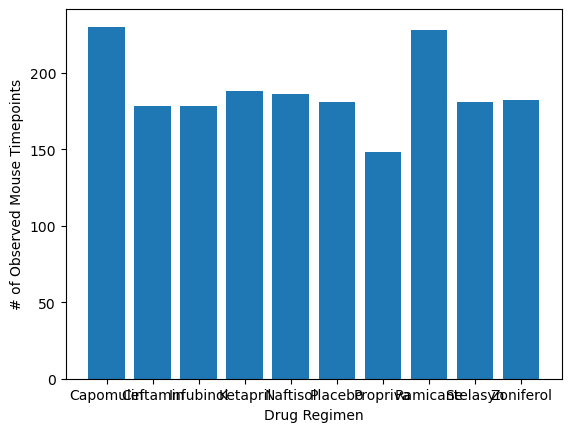

In [147]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
index = drug_regimen.index
plt.bar(index, drug_regimen)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


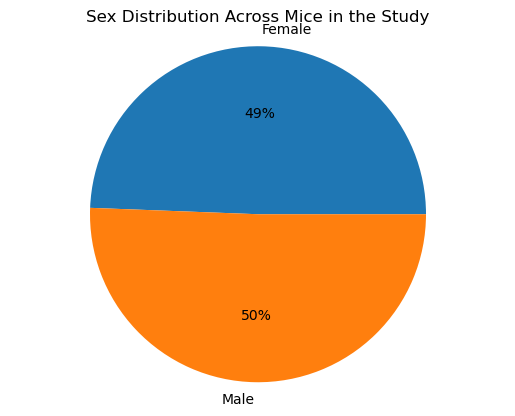

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = mouse_study.groupby("Sex").size()
mice_sex.plot(kind="pie", autopct= "%2.i%%")
plt.axis("equal")
plt.title("Sex Distribution Across Mice in the Study")
plt.show()

# How does it look?

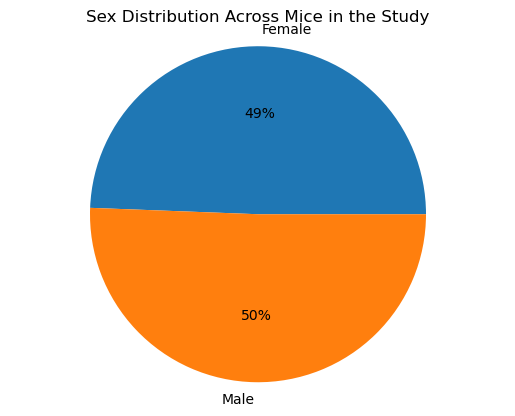

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex, labels=mice_sex.index, autopct= "%2.i%%")
plt.axis("equal")
plt.title("Sex Distribution Across Mice in the Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [159]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

treatment_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
only_4_regimen_data = duplicate_clean.loc[duplicate_clean["Drug Regimen"].isin(treatment_regimen)]
final_volume = only_4_regimen_data.groupby("Mouse ID")["Timepoint"].max()
final_volume

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_merge = pd.merge(only_4_regimen_data, final_volume, on=['Mouse ID','Timepoint'])
study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [160]:
testing = duplicate_clean.loc[duplicate_clean["Drug Regimen"].isin(treatment_regimen)]
testing.shape

(814, 8)

In [162]:
study_merge.shape

(100, 8)

In [164]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = []


# Create empty list to fill with tumor vol data (for plotting)
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_series = study_merge.loc[study_merge["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

    # add subset 
    tumor_volume.append(tumor_series)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_series.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    IQR = upper_q - lower_q
       
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * IQR)
    upper_bound = upper_q + (1.5 * IQR)
    outliers = tumor_series.loc[(tumor_series < lower_bound) | (tumor_series > upper_bound)]
    print(f"{treatment}:{outliers}")

Capomulin:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:58    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:Series([], Name: Tumor Volume (mm3), dtype: float64)


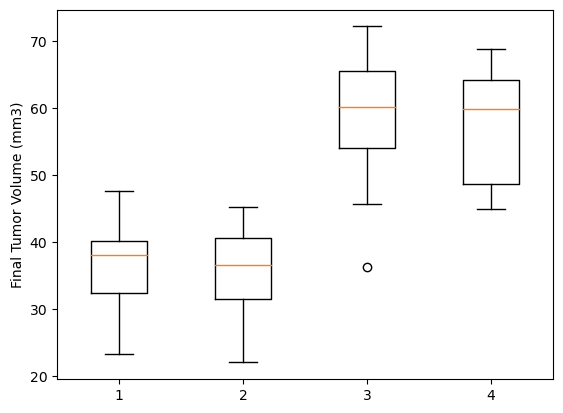

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [167]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_I509 = study_merge[study_merge["Drug Regimen"] == "Capomulin", [study_merge["Mouse ID"] == "I509"]]
plt.plot(tumor_volume["I509"], Timepoint)
plt.label("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

InvalidIndexError: (0     False
1      True
2      True
3      True
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Drug Regimen, Length: 100, dtype: bool, [0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Mouse ID, Length: 100, dtype: bool])

In [170]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_p = study_merge[study_merge["Drug Regimen"] == "Capomulin", study_merge["tumor_series"]]
plt.scatter()
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

KeyError: 'tumor_series'

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_r = mouse_study[mouse_study["Drug Regimen"] == "Capomulin"]

average_volume = capomulin_r.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

average_weight = capomulin_r.groupby("Mouse ID")["Weight (g)"].mean()

c_c = st.pearsonr(average_weight, average_volume)

print(f"The correlation between mouse weight and the average tumor volume is: {c_c}")

plt.scatter(mouse_study["Weight (g)"], mouse_study[average_volume], marker="0")
plt.xlabel("Weight (g)")
plt.ylabel("AVerage Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and the average tumor volume is: PearsonRResult(statistic=0.8419363424694719, pvalue=1.3225722434712605e-07)


KeyError: "None of [Float64Index([      41.963635634,       40.083699304,        36.50597276,\n              41.990096605999994, 44.613343895999996,       44.805809685,\n                     39.14105275,       44.465236345,     43.21692460875,\n                     44.43447379,       42.507261035,       34.847469897,\n                    39.049816448,      45.7989695075,       36.509212046,\n                    43.367364453,       34.559143395,       42.803733044,\n                    39.328725099,       39.887495191,       41.581595101,\n                     41.38482521,       41.352452281,       36.182039562,\n                    38.506829248],\n             dtype='float64')] are in the [columns]"